In [50]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
df_emisiones = pd.read_excel('../Datasets/Emisiones_CO2.xlsx', 'Datos de CO2')
print(df_emisiones.columns)

Index(['Código de país', 'Nombre del país', 'Región', 'Año', 'CO2 (kt)',
       'CO2 per cápita (toneladas métricas)'],
      dtype='object')


In [53]:
df_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código de país                       11127 non-null  object 
 1   Nombre del país                      11127 non-null  object 
 2   Región                               11127 non-null  object 
 3   Año                                  11127 non-null  int64  
 4   CO2 (kt)                             9032 non-null   float64
 5   CO2 per cápita (toneladas métricas)  9029 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 521.7+ KB


In [54]:
df_emisiones.dropna(subset=['CO2 (kt)'], inplace=True)

In [55]:
df_emisiones.drop(columns=['CO2 per cápita (toneladas métricas)'], inplace=True)

In [56]:
df_emisiones.rename(columns={'CO2 (kt)': 'CO2kt'}, inplace=True)

In [57]:
df_emisiones.rename(columns={'Código de país': 'Código_Pais', 'Nombre del país': 'Nombre_País'}, inplace=True)

In [ ]:
df_emisiones.Nombre_País.value_counts()

<AxesSubplot:xlabel='Año', ylabel='CO2kt'>

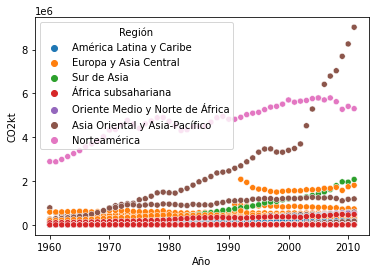

In [42]:
sns.scatterplot(x="Año", y="CO2kt", hue="Región", data=df_emisiones)

<AxesSubplot:xlabel='Año', ylabel='CO2kt'>

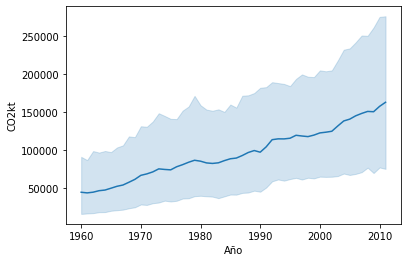

In [43]:
sns.lineplot(x="Año", y="CO2kt", data=df_emisiones)

**Ejercicio 1**

CONSIGNA:

1. Mediante una regresión linear, encontrar el valor esperado de emisiones globales tomando el conjunto de datos completo para 2021:

In [44]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn import linear_model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression(fit_intercept=True)

In [61]:
X = df_emisiones.Año.values.reshape(-1,1)
y = df_emisiones.CO2kt.values.reshape(-1,1)
model.fit(X, y)

LinearRegression()

In [62]:
print(model.coef_)
print(model.intercept_)
print(model.rank_)

[[2197.43054803]]
[-4267376.12944341]
1


In [63]:
X_pred = np.arange(df_emisiones.Año.max() + 1, df_emisiones.Año.max() + 11).reshape(-1,1)
X_pred

array([[2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]])

CONSIGNA:

1. Mediante una regresión linear por región, encontrar el valor esperado de emisiones globales por cada una y sumarlas para obtener un global para 2021:

In [48]:
regiones = df_emisiones.Región.unique()
regiones


array(['América Latina y Caribe', 'Europa y Asia Central', 'Sur de Asia',
       'África subsahariana', 'Oriente Medio y Norte de África',
       'Asia Oriental y Asia-Pacífico', 'Norteamérica'], dtype=object)

In [65]:
y_pred_regiones = 0
for r in regiones:
    df_emisiones_region=df_emisiones.loc[(df_emisiones['Región']==r)]
    X=df_emisiones_region.Año.values.reshape(-1,1)
    y=df_emisiones_region.CO2kt.values.reshape(-1,1)
    model.fit(X,y)
    y_pred=model.predict(X_pred)
    y_pred_regiones += y_pred[9,0]

y_pred_regiones

3339571.9562484697

CONSIGNA:

1. Mediante una regresión linear por país, encontrar el valor esperado de emisiones globales por cada uno y sumarlas para obtener un global para 2021.

In [ ]:
paises = df_emisiones.Nombre_País.unique()
paises

array(['Aruba', 'Andorra', 'Afganistán', 'Angola', 'Albania',
       'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
       'Burundi', 'Bélgica', 'Benín', 'Burkina Faso', 'Bangladés',
       'Bulgaria', 'Baréin', 'Bahamas', 'Bosnia y Herzegovina',
       'Bielorrusia', 'Belice', 'Bermudas', 'Bolivia', 'Brasil',
       'Barbados', 'Brunéi', 'Bután', 'Botsuana',
       'República Centroafricana', 'Canadá', 'Suiza', 'Chile', 'China',
       'Costa de Marfil', 'Camerún', 'Congo (República)', 'Colombia',
       'Comoras', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Islas Caimán',
       'Chipre', 'República Checa', 'Alemania', 'Yibuti', 'Dominica',
       'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador',
       'Egipto', 'Eritrea', 'España', 'Estonia', 'Etiopía', 'Finlandia',
       'Fiyi', 'Francia', 'Islas Feroe', 'Micronesia (Estados Federados)',
       'Gabón', 'Reino Unido', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
  

In [67]:
y_pred_paises = 0
for p in paises:
    df_emisiones_pais=df_emisiones.loc[(df_emisiones['Nombre_País']==p)]
    X=df_emisiones_pais.Año.values.reshape(-1,1)
    y=df_emisiones_pais.CO2kt.values.reshape(-1,1)
    model.fit(X,y)
    y_pred=model.predict(X_pred)
    y_pred_paises += y_pred[9,0]
y_pred_paises

32776599.95952888

**Ejercicio 2**

CONSIGNA:

1. ¿Son iguales los resultados de las regresiones tomadas por país, región y global?
No
2. Si realizamos nuevamente una regresión linear por país, pero solo evaluando desde 1990, ¿esperamos los mismos valores de emisiones globales?

3. ¿Por qué ocurre esa diferencia?

In [ ]:
paises= df_emisiones[df_emisiones['Año']>=1990].Nombre_País.unique()
paises

array(['Aruba', 'Andorra', 'Afganistán', 'Angola', 'Albania',
       'Emiratos Árabes Unidos', 'Argentina', 'Armenia',
       'Antigua y Barbuda', 'Australia', 'Austria', 'Azerbaiyán',
       'Burundi', 'Bélgica', 'Benín', 'Burkina Faso', 'Bangladés',
       'Bulgaria', 'Baréin', 'Bahamas', 'Bosnia y Herzegovina',
       'Bielorrusia', 'Belice', 'Bermudas', 'Bolivia', 'Brasil',
       'Barbados', 'Brunéi', 'Bután', 'Botsuana',
       'República Centroafricana', 'Canadá', 'Suiza', 'Chile', 'China',
       'Costa de Marfil', 'Camerún', 'Congo (República)', 'Colombia',
       'Comoras', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Islas Caimán',
       'Chipre', 'República Checa', 'Alemania', 'Yibuti', 'Dominica',
       'Dinamarca', 'República Dominicana', 'Argelia', 'Ecuador',
       'Egipto', 'Eritrea', 'España', 'Estonia', 'Etiopía', 'Finlandia',
       'Fiyi', 'Francia', 'Islas Feroe', 'Micronesia (Estados Federados)',
       'Gabón', 'Reino Unido', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
  

In [70]:
y_pred_paises = 0
for p in paises:
    df_emisiones_pais=df_emisiones.loc[(df_emisiones['Nombre_País']==p)]
    X=df_emisiones_pais.Año.values.reshape(-1,1)
    y=df_emisiones_pais.CO2kt.values.reshape(-1,1)
    model.fit(X,y)
    y_pred=model.predict(X_pred)
    y_pred_paises += y_pred[9,0]
y_pred_paises

32776599.95952888

**Ejercicio 3**

CONSIGNA:

Tomando sólo los datos desde 1990...
1. ¿Cuáles son los 5 países que presentan un MAYOR incremento año a año en sus emisiones?
2. ¿Cuáles son los 5 países que presentan un MENOR incremento año a año en sus emisiones?
3. ¿Cuáles son los 5 países que presentan un MAYOR valor esperado para 2021?
4. ¿Cuáles son los 5 países que presentan un MENOR valor esperado para 2021?

In [ ]:
paises = df_emisiones.Nombre_País.unique()
paises

In [30]:
df_emisiones_pais_incre=pd.DataFrame([],columns=['Nombre_País', 'Región','Coeficiente','Esperado2021'])



In [77]:

for p in paises:
    df_emisiones_pais=df_emisiones.loc[(df_emisiones['Nombre_País']==p) & (df_emisiones['Año'])]
    X=df_emisiones_pais.Año.values.reshape(-1,1)
    y=df_emisiones_pais.CO2kt.values.reshape(-1,1)
    model.fit(X,y)
    coeficiente=model.coef_[0][0]
    y_pred=model.predict(X_pred)
    esperado2021 = y_pred[9,0]
    region=df_emisiones_pais.Región.unique()[0]
    to_append = [p,region,coeficiente,esperado2021]
    a_series = pd.Series(to_append,index=df_emisiones_pais_incre.columns)
    df_emisiones_pais_incre = df_emisiones_pais_incre.append(a_series, ignore_index=True)

df_emisiones_pais_incre

/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_42039/3448600299.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emisiones_pais_incre = df_emisiones_pais_incre.append(a_series, ignore_index=True)
/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_42039/3448600299.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emisiones_pais_incre = df_emisiones_pais_incre.append(a_series, ignore_index=True)
/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_42039/3448600299.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emisiones_pais_incre = df_emisiones_pais_incre.append(a_series, ignore_index=True)
/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_42039/3448600299.py:12: Futur

,Nombre_País,Región,Coeficiente,Esperado2021
0,China,Asia Oriental y Asia-Pacífico,138678.552716,7578821.300838
1,China,Asia Oriental y Asia-Pacífico,138678.552716,7578821.300838
2,Estados Unidos,Norteamérica,47108.939827,6365412.662803
3,Estados Unidos,Norteamérica,47108.939827,6365412.662803
4,India,Sur de Asia,35853.097109,1980794.786137
...,...,...,...,...
592,Yemen,Oriente Medio y Norte de África,432.731709,24727.903675
593,Sudáfrica,África subsahariana,7435.459279,544415.380906
594,Congo (República Democrática),África subsahariana,-3.321605,2956.268051
595,Zambia,África subsahariana,-54.393583,1226.466774


In [76]:
df_emisiones_pais_incre.sort_values(by=['Coeficiente'],ascending=False, inplace=True)


In [ ]:
df_emisiones_pais_incre.head()